## 载入数据

In [2]:
import tensorflow as tf

# 导入Tensorflow提供的读取MNIST的模块
import tensorflow_core.examples.tutorials.mnist.input_data as input_data

# 读取MNIST数据
mnist = input_data.read_data_sets("/data/MNIST_data/", one_hot=True)


Extracting /data/MNIST_data/train-images-idx3-ubyte.gz
Extracting /data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# 构建输入层
x = tf.placeholder(tf.float32, [None, 784], name="X")
y = tf.placeholder(tf.float32, [None, 10], name="Y")

# 构建隐藏层
# 隐藏层神经元数量
H1_NN = 256

W1 = tf.Variable(tf.random_normal([784, H1_NN]))
b1 = tf.Variable(tf.zeros([H1_NN]))

Y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

# 构建输出层
W2 = tf.Variable(tf.random_normal([H1_NN, 10]))
b2 = tf.Variable(tf.zeros([10]))

forward = tf.matmul(Y1, W2) + b2
pred = tf.nn.softmax(forward)


In [4]:
# 定义损失函数
loss_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=forward, labels=y)
)

# 设置训练参数
train_epochs = 40
batch_size = 50
total_batch = int(mnist.train.num_examples / batch_size)
display_step = 1
learning_rate = 0.01

# 选择优化器
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

# 定义准确率
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [5]:
# 训练
# 记录训练开始时间
from time import time

startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)  # 读取批次数据
        sess.run(optimizer, feed_dict={x: xs, y: ys})  # 执行批次训练

    # total_batch个批次训练完成后，使用验证数据计算误差与准确率
    loss, acc = sess.run(
        [loss_function, accuracy],
        feed_dict={x: mnist.validation.images, y: mnist.validation.labels},
    )

    if (epoch + 1) % display_step == 0:
        print(
            "Train Epoch:",
            "%02d" % (epoch + 1),
            "Loss=",
            "{:.9f}".format(loss),
            " Accuracy=",
            "{:.4f}".format(acc),
        )

# 显示运行总时间
duration = time() - startTime
print("Train Finished takes:", "{:.2f}".format(duration))


Train Epoch: 01 Loss= 1.425595999  Accuracy= 0.9278
Train Epoch: 02 Loss= 0.708664596  Accuracy= 0.9444
Train Epoch: 03 Loss= 0.498178750  Accuracy= 0.9580
Train Epoch: 04 Loss= 0.395425767  Accuracy= 0.9578
Train Epoch: 05 Loss= 0.434585243  Accuracy= 0.9604
Train Epoch: 06 Loss= 0.407636136  Accuracy= 0.9586
Train Epoch: 07 Loss= 0.380849630  Accuracy= 0.9592
Train Epoch: 08 Loss= 0.370502234  Accuracy= 0.9616
Train Epoch: 09 Loss= 0.349700928  Accuracy= 0.9610
Train Epoch: 10 Loss= 0.349942982  Accuracy= 0.9618
Train Epoch: 11 Loss= 0.320944518  Accuracy= 0.9714
Train Epoch: 12 Loss= 0.394496322  Accuracy= 0.9664
Train Epoch: 13 Loss= 0.447634757  Accuracy= 0.9576
Train Epoch: 14 Loss= 0.442712694  Accuracy= 0.9636
Train Epoch: 15 Loss= 0.417934388  Accuracy= 0.9670
Train Epoch: 16 Loss= 0.404188782  Accuracy= 0.9694
Train Epoch: 17 Loss= 0.477282286  Accuracy= 0.9670
Train Epoch: 18 Loss= 0.499315530  Accuracy= 0.9688
Train Epoch: 19 Loss= 0.544126511  Accuracy= 0.9696
Train Epoch:

## 评估模型

In [6]:
accu_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

print("Test Accuracy:", accu_test)


Test Accuracy: 0.971


## 应用模型


In [7]:
# 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字

prediction_result = sess.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})

# 查看预测结果中的前10项
prediction_result[0:10]


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

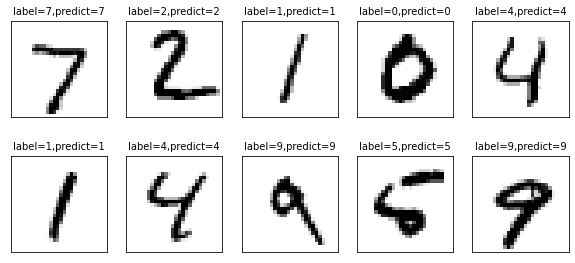

In [8]:
import matplotlib.pyplot as plt
import numpy as np


def plot_images_labels_prediction(
    images,  # 图像列表
    labels,  # 标签列表
    prediction,  # 预测值列表
    index,  # 从第index个开始显示
    num=10,
):  # 缺省一次显示 10 幅
    fig = plt.gcf()  # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12)  # 1英寸等于 2.54 cm
    if num > 25:
        num = 25  # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)  # 获取当前要处理的子图

        ax.imshow(
            np.reshape(images[index], (28, 28)),  # 显示第index个图像
            cmap="binary",
        )

        title = "label=" + str(np.argmax(labels[index]))  # 构建该图上要显示的title信息
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[index])

        ax.set_title(title, fontsize=10)  # 显示图上的title信息
        ax.set_xticks([])  # 不显示坐标轴
        ax.set_yticks([])
        index += 1
    plt.show()


plot_images_labels_prediction(
    mnist.test.images, mnist.test.labels, prediction_result, 0, 10
)


In [9]:
compare_lists = prediction_result == np.argmax(mnist.test.labels, 1)
print(compare_lists)


[ True  True  True ...  True  True  True]


In [10]:
err_lists = [i for i in range(len(compare_lists)) if compare_lists[i] == False]
print(err_lists, len(err_lists))


[124, 233, 241, 247, 259, 277, 321, 326, 340, 391, 404, 417, 435, 445, 447, 448, 449, 495, 582, 583, 645, 646, 659, 674, 684, 691, 707, 839, 844, 947, 951, 956, 965, 1014, 1039, 1044, 1082, 1092, 1101, 1112, 1156, 1178, 1182, 1202, 1226, 1232, 1247, 1319, 1364, 1393, 1414, 1425, 1500, 1522, 1530, 1549, 1553, 1609, 1626, 1681, 1709, 1717, 1748, 1782, 1790, 1850, 1901, 1903, 1910, 1941, 1952, 1955, 1968, 1969, 1973, 2035, 2052, 2053, 2056, 2070, 2093, 2098, 2109, 2118, 2125, 2129, 2130, 2135, 2162, 2182, 2224, 2272, 2293, 2358, 2369, 2387, 2395, 2405, 2447, 2462, 2488, 2582, 2597, 2648, 2654, 2720, 2743, 2810, 2829, 2877, 2896, 2917, 2921, 2927, 2939, 2945, 3012, 3060, 3073, 3102, 3117, 3130, 3172, 3218, 3225, 3289, 3384, 3422, 3475, 3490, 3503, 3511, 3520, 3549, 3558, 3559, 3567, 3580, 3597, 3604, 3629, 3662, 3767, 3780, 3782, 3808, 3811, 3818, 3838, 3853, 3871, 3893, 3902, 3906, 3941, 3951, 3985, 4000, 4017, 4027, 4065, 4075, 4078, 4102, 4140, 4163, 4176, 4201, 4205, 4224, 4248, 4255, 

In [11]:
# 定义一个输出错误分类的函数
import numpy as np


def print_predict_errs(
    labels,  # 标签列表
    prediction,
):  # 预测值列表
    count = 0
    compare_lists = prediction == np.argmax(labels, 1)
    err_lists = [i for i in range(len(compare_lists)) if compare_lists[i] == False]
    for x in err_lists:
        print(
            "index=" + str(x) + " 标签值=",
            np.argmax(labels[x]),
            "预测值=",
            prediction[x],
        )
        count = count + 1
    print("总计:" + str(count))


In [ ]:
print_predict_errs(labels=mnist.test.labels, prediction=prediction_result)


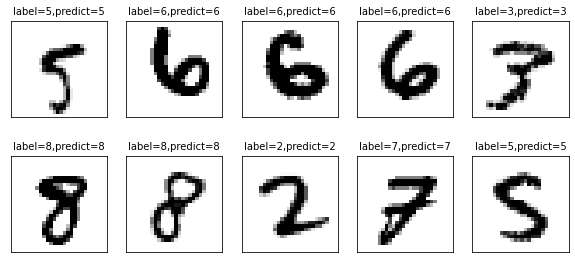

In [13]:
plot_images_labels_prediction(
    mnist.test.images, mnist.test.labels, prediction_result, 460, 10
)
